<a href="https://colab.research.google.com/github/taneshkaa/INSAIND---Assignment/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the Dependencies

import numpy as np 
import pandas as pd

In [2]:
#Uploading the Dataset 

from google.colab import files
uploaded = files.upload()

Saving Fraud.csv to Fraud.csv


**Dataset Link** -: https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data 

Details about Dataset -:

- **steps:** steps of transaction (Time/Duration)

- **type:** type of payment (CASH, TRANSFER, DEBIT, etc.)
- **amount:** total amount of transaction in local currency
- **nameOrig**: customer name (sender) 
- **oldbalanceOrg:** initial balance before the transaction 
- **newbalanceOrig**: new balance after the transaction (capital sent)
- **nameDest:** customer name (receiver)
- **oldbalanceDest:** intial balance before the transaction 
- **newbalanceDest:** new balance after the transaction (capital received)
- **isFraud:** transaction made by fraudulent agents; It is the behaviour of the agentswho aim to gain profit by taking control over customer's account and try to empty the funds
- **isFlaggedFraud:** it aims to control massive transfers from one account to another and flags illegal attempt

**Note** - There is no information of Merchant in the dataset uploaded!


In [3]:
#Reading the file
df=pd.read_csv('Fraud.csv')

In [4]:
#Rows and Columns of Dataset
df.shape

(6362620, 11)

## **Reading & Tabulating the Dataset**

In [5]:
#Reading first 6 data items 
df.head(6)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0


In [6]:
#Reading first 50 data items 
df.head(50)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [7]:
#Reading last 6 data items 
df.tail(6)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [8]:
#Reading last 50 data items 
df.tail(50)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362570,740,TRANSFER,748139.48,C1183186026,748139.48,0.00,C1620658775,0.00,0.00,1,0
6362571,740,CASH_OUT,748139.48,C959562247,748139.48,0.00,C1768725891,0.00,748139.48,1,0
6362572,740,TRANSFER,1312694.50,C1681615431,1312694.50,0.00,C492082350,0.00,0.00,1,0
6362573,740,CASH_OUT,1312694.50,C1078953751,1312694.50,0.00,C1920187579,0.00,1312694.50,1,0
6362574,740,TRANSFER,1755647.81,C507031767,1755647.81,0.00,C692082136,0.00,0.00,1,0
6362575,740,CASH_OUT,1755647.81,C1724432558,1755647.81,0.00,C22170584,2930014.23,4685662.04,1,0
6362576,741,TRANSFER,10000000.00,C780743034,45674547.89,35674547.89,C491519946,0.00,0.00,1,0
6362577,741,CASH_OUT,10000000.00,C421958672,10000000.00,0.00,C2034016962,0.00,10000000.00,1,0
6362578,741,TRANSFER,10000000.00,C1111699947,35674547.89,25674547.89,C949015157,0.00,0.00,1,0
6362579,741,CASH_OUT,10000000.00,C1647199421,10000000.00,0.00,C2077145577,35922.97,10035922.97,1,0


## **Data Analysis**

In [9]:
#Checking for NULL Values (if any)
df.isnull().values.any()

False

In [10]:
#Detailed information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [12]:
authentic = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
authentic_percent = (authentic / (fraud + authentic)) * 100
fraud_percent = (fraud / (fraud + authentic)) * 100

print("Number of Authentic transactions: ", authentic)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Authentic transactions: {:.4f} %".format(authentic_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Authentic transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Authentic transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


Theabove results reflect - it is an unbalanced data as **Percentage of Authentic Transactions = 99.87 %** and **Percentage of Fraudulent Transactions = 0.13 %**. 

Thus, **Decision Trees** and **Random Forest** can be an applicable approaches for the above unbalanced dataset.

In [13]:
#Importing the Dependencies
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Visualization**

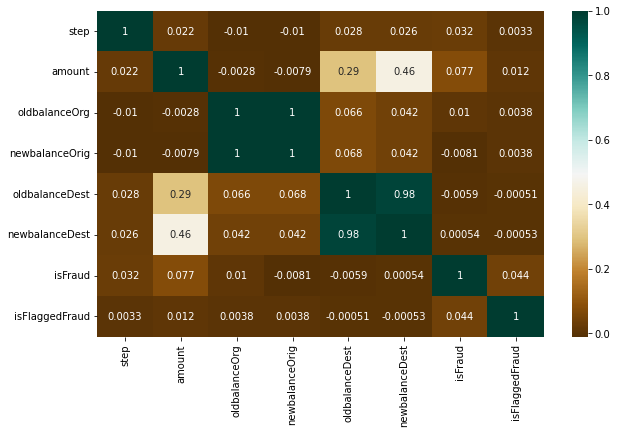

In [23]:
#Correlation Heatmap
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True, cmap='BrBG')

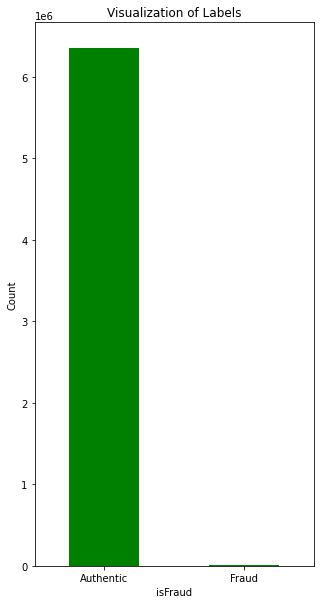

In [27]:
#Number of Authentic and Fraudulent Transaction
plt.figure(figsize=(5,10))
labels = ["Authentic", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0, color='green')
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [28]:
#Copy of Original Dataset for Training & Testing the Model

new_df=df.copy()
new_df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


## **Label Encoding**

In [29]:
#Checking for Objects (dtype)
objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


Object Datatype - 3

Labal Encode these attributes, in order to check Multicolinearity

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


In [31]:
new_df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.0,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.0,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.0,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.0,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.0,0.00,0,0
5,1,3,7817.71,6026525,53860.00,46042.29,2247218,0.0,0.00,0,0
6,1,3,7107.77,1805947,183195.00,176087.23,2063363,0.0,0.00,0,0
7,1,3,7861.64,2999171,176087.23,168225.59,2314008,0.0,0.00,0,0
8,1,3,4024.36,869140,2671.00,0.00,768940,0.0,0.00,0,0
9,1,2,5337.77,5407276,41720.00,36382.23,282960,41898.0,40348.79,0,0


In [32]:
#Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


Collinearity between the following attributes -: 
- oldbalanceOrg & newbalanceOrig
- oldbalanceDest & newbalanceDest
- nameOrig & nameDest

In [33]:
#Combining collinear pair attributes
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


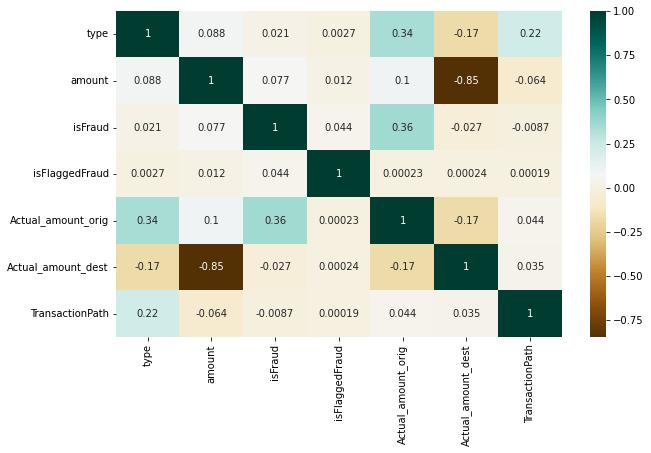

In [35]:
#Correlation Heatmap
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True, cmap='BrBG')

## **Model Building**

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [37]:
#Scaling Procedures
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

**Note** - Normalising Complete Dataset can cause decrement in Accuracy of the Model!

In [38]:
#Train-Test Split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


In [46]:
#Model Training - Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [47]:
#Model Training - Random Forest
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

## **Model Evaluation**

In [48]:
print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.92324964663403
Random Forest Score:  99.95866482675376


In [49]:
#Decision Tree - Confusion Matrix

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 1719
False Positives: 749
True Negatives: 1905602
False Negatives: 716


In [50]:
#Random Forest - Confusion Matrix

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 1710
False Positives: 64
True Negatives: 1906287
False Negatives: 725


In [51]:
#Decision Tree - Classification Report
classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.70      0.71      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786



In [52]:
#Random Forest - Classification Report
classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



It reflects with quality precision, **Random Forest** is superior in this situation

TP(Decision Tree) ~ TP(Random Forest) - [nearly equivalent] 

FP(Decision Tree) >> FP(Random Forest) - [random forest is better]

TN(Decision Tree) < TN(Random Forest) - [random forest is better]

FN(Decision Tree) ~ FN(Random Forest) - [nearly equivalent]

Thus, the above results reflect that **Random Forest** is better than Decision Tree in this situation!

In [53]:
#Confusion Matrix - Decision Tree
confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

Confusion Matrix - Decision Tree
[[1905602     749]
 [    716    1719]]


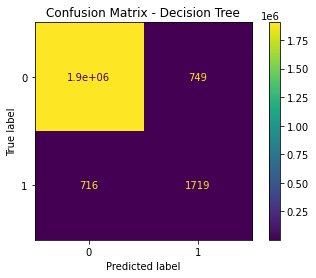

In [54]:
#Visualization - Confusion Matrix of Decision Tree
disp = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [55]:
#Confusion Matrix - Random Forest
confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[1906287      64]
 [    725    1710]]


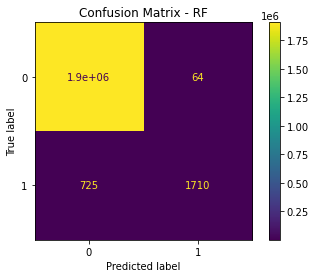

In [56]:
#Visualization - Confusion Matrix of Random Forest
disp = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

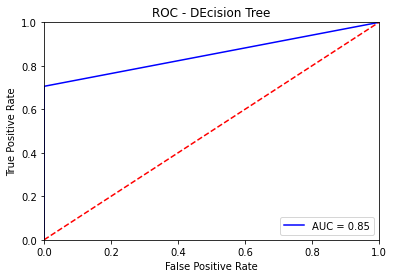

In [57]:
# ROC - Decision Tree
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DEcision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

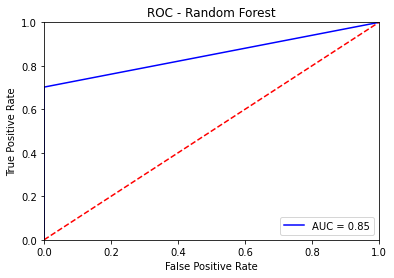

In [58]:
#ROC - Random Forest
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Thus, Area under the ROC Curve is equal for both Decision Tree & Random Forest. Both models reflect quality results in their own way!

## **Conclusion**

It is reflected that Accuracy of both Random Forest and Decision Tree is equivalent, although the precision of Random Forest is more supirior than decision tree. 

In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly, the Fraud transactions to be predicted correctly and LAuthentic Transactions to be left off. If these are not taken care of, there is slight chance that an innocent can be framed and the culprit is on the loose.

Therefore in my point of view, Decision Tree and Random Forest are optimal approches in these cases.


Furthermore, the imported dataset is highly unbalanced dataset (Authentic: Fraud :: 99.87::0.13). Random forest has multiple decision trees - which is optimal but it is time consuming; and Decision Tree makes decisions in a boolean way.


Models like ANN, Logistic Regression or bagging may provide accurate results but may lag in precision and recall values.

**Q. How did you select variables to be included in the model?**

Initially checking correlation attributes, then using VIF [Variance Inflation Factor] and Correlation Heatmap.

Here, higly correlated attributes are used and less correlated attributes are dropped out.

**Q. What are the key factors that predict fradulent customers? Do these factors make sense? If yes, How? If not, How not?**

1. Identity of the customer... Is it authentic or not? Some kind of proof of identity, etc.
2. The source requesting for transaction... Is it legitimate/authentic?
3. Transaction history of vendor... Is is genuine or not? 
4. Authorization and Authentications play vital role in transactional actions.

These are some of the factors to predict and prevent fraudulent customers. These key factors do ensure predicting actual or fradulent transactional actions.

**Q. What kind of preventions should be opted while company updates its architecture?**

Prevention of fradulent actions can be done by following -:
1. ensuring proper authorization & authentication measures. 
2. ensuring the customer identity with some proof.
3. by using secure networking.
4. ignore and beware irrelevant/ unwanted messages, email, calls.
5. try using two-step authentication, to be more sure.
6. using secure and genuine applications and links.


**Q. Assuming these actions have been implemented, how would you determine if they work?**

1. by maintaining database for transactional actions and notifying the customers regularly.
2. by sending E-Statements. 